* MSV_HoVaTen:
521H0501_Phan Minh Hoàng,
521H0398_Lê Nguyễn Viết Hiệp,
521H0276_Trang Sĩ Nam



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bike_buyers.csv')

In [3]:
data = data.dropna()

In [4]:
data.duplicated().value_counts()

False    952
dtype: int64

In [5]:
data = data.drop_duplicates()

* Transformation

In [6]:
# Tranform data
from sklearn.preprocessing import LabelEncoder

types = data.dtypes
names = list(data.columns)

le = LabelEncoder()
for i in range(len(types)):
    if types.iloc[i]=='object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

* Normalization


In [7]:
from sklearn.preprocessing import MinMaxScaler
features = data.drop(['Purchased Bike', 'ID'], axis=1)

scaler = MinMaxScaler()
model= scaler.fit(features)
scaled_data= pd.DataFrame(model.transform(features))

* Feature Selection

In [8]:
# split data
X = scaled_data
y = data['Purchased Bike']

<Axes: >

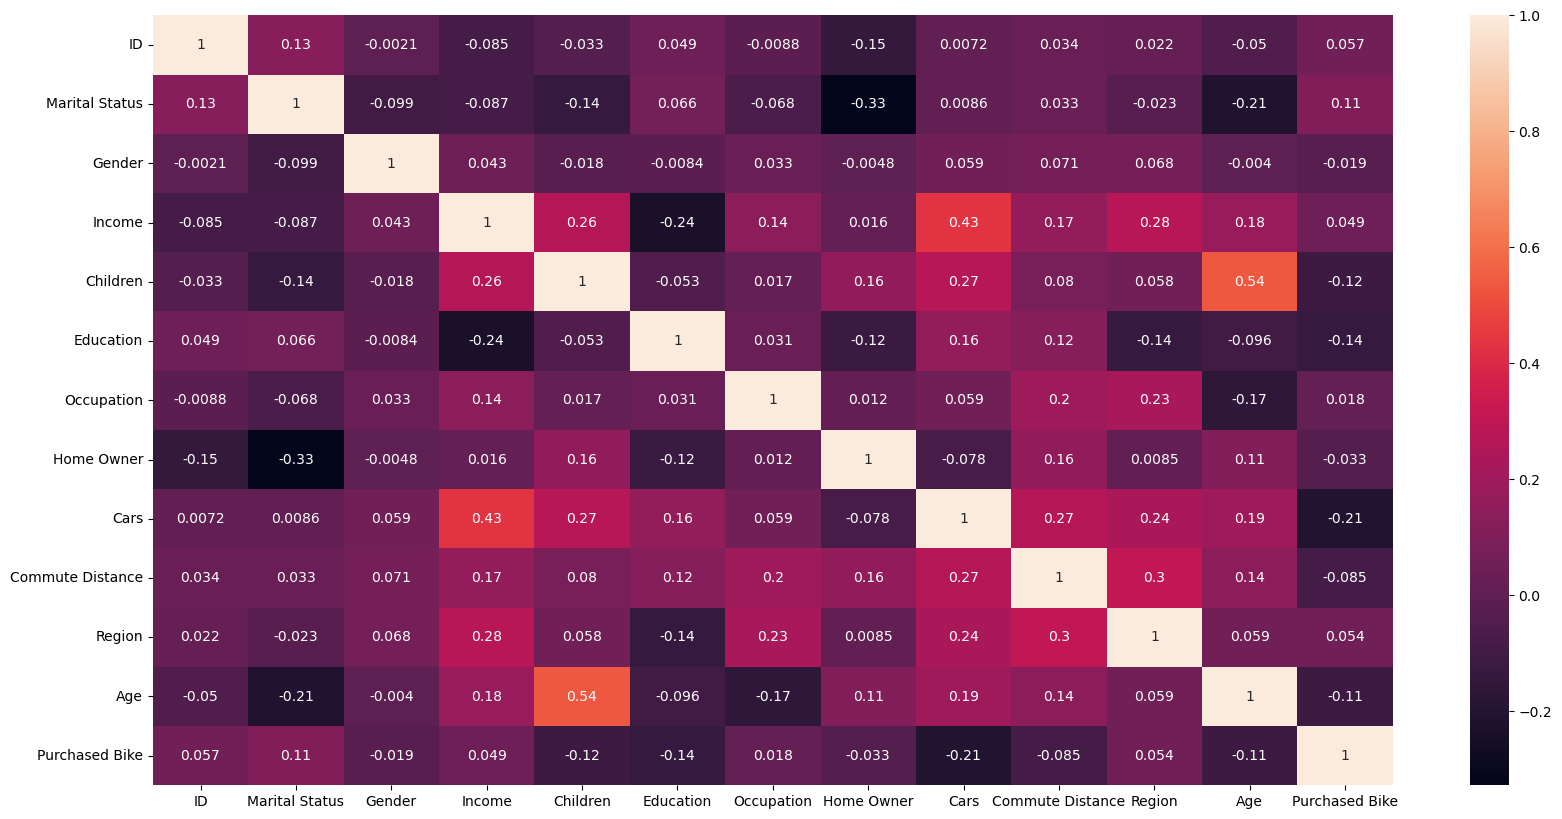

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

In [10]:
data = data.drop(['ID'], axis=1)

* FFNN

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

In [12]:
model = tf.keras.models.Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.2)) 
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Tránh Overfitting:
- Dropout Layers
- Early Stopping
- Normalizaiton (MinMaxScaler)
- Features Selection

In [13]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, Y_train, epochs=200, batch_size=512, callbacks=[earlystopping], validation_data=[X_test, Y_test])

Epoch 1/200
2/2 [==============================] - 1s 120ms/step - loss: 0.6896 - accuracy: 0.5177 - val_loss: 0.6879 - val_accuracy: 0.5079
Epoch 2/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6901 - accuracy: 0.5440 - val_loss: 0.6891 - val_accuracy: 0.5497
Epoch 3/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6946 - accuracy: 0.4980 - val_loss: 0.6844 - val_accuracy: 0.5550
Epoch 4/200
2/2 [==============================] - 0s 18ms/step - loss: 0.6986 - accuracy: 0.4954 - val_loss: 0.6718 - val_accuracy: 0.6440
Epoch 5/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6709 - accuracy: 0.6018 - val_loss: 0.6673 - val_accuracy: 0.6230
Epoch 6/200
2/2 [==============================] - 0s 18ms/step - loss: 0.6725 - accuracy: 0.5834 - val_loss: 0.6673 - val_accuracy: 0.6387
Epoch 7/200
2/2 [==============================] - 0s 20ms/step - loss: 0.6689 - accuracy: 0.6124 - val_loss: 0.6734 - val_accuracy: 0.6073
Epoch 8/200
2/2 [==

In [14]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

6/6 [==============================] - 0s 987us/step - loss: 0.6165 - accuracy: 0.6963
Test accuracy: 69.63%


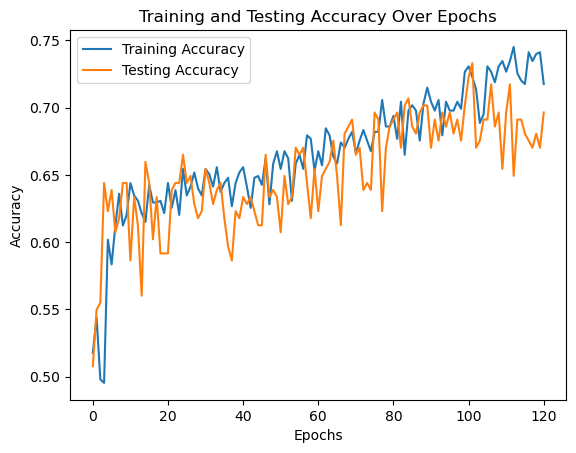

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()